In [1]:
# MLP FashionMNIST
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader
train_dataset=datasets.FashionMNIST(root='FashionMNIST_data/', train=True, #학습 데이터
                                   transform=transforms.ToTensor(), # 0~255까지의 값을 0~1 사이의 값으로 변환시켜줌
                                   download=True)
test_dataset=datasets.FashionMNIST(root='FashionMNIST_data/', train=False, #학습 데이터
                                   transform=transforms.ToTensor(), # 0~255까지의 값을 0~1 사이의 값으로 변환시켜줌
                                   download=True)

C:\Users\ANNA_TEST\anaconda3\Lib\site-packages\torch\cuda\__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [2]:
print(len(train_dataset))

train_dataset_size=int(len(train_dataset)*0.85)
validation_dataset_size=int(len(train_dataset)*0.15)

train_dataset, validation_dataset=random_split(train_dataset,[train_dataset_size, validation_dataset_size])

print(len(train_dataset), len(validation_dataset), len(test_dataset))

60000
51000 9000 10000


In [3]:
class MyDeepLearningModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.fc1=nn.Linear(784,256)
        self.reLU=nn.ReLU()
        self.dropout=nn.Dropout(0.3)
        self.fc2=nn.Linear(256,10)

    def forward(self,data):
        data=self.flatten(data)
        data=self.fc1(data)
        data=self.reLU(data)
        data=self.dropout(data)
        logits=self.fc2(data)
        return logits
    

In [4]:
BATCH_SIZE=32

train_dataset_loader=DataLoader(dataset=train_dataset,
                                batch_size=BATCH_SIZE,
                                shuffle=True)
validation_dataset_loader=DataLoader(dataset=validation_dataset,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True)
test_dataset_loader=DataLoader(dataset=test_dataset,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

In [5]:
model=MyDeepLearningModel()
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-2)

In [6]:
def model_train(dataloader, model, loss_function, optimizer):

    model.train()

    train_loss_sum=train_correct=train_total=0
    total_train_batch=len(dataloader)

    for images, labels in dataloader:
        x_train=images.view(-1,28*28)
        y_train=labels

        outputs=model(x_train)
        loss=loss_function(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum+=loss.item()

        train_total+=y_train.size(0)
        train_correct+=((torch.argmax(outputs, 1)==y_train)).sum().item()

    train_avg_loss=train_loss_sum/total_train_batch
    train_avg_accuracy=100*train_correct/train_total

    return (train_avg_loss, train_avg_accuracy)

In [7]:
def model_evaluate(dataloader, model, loss_function, optimizer):

    model.eval()

    with torch.no_grad():

        val_loss_sum=val_correct=val_total=0

        total_val_batch=len(dataloader)

        for images, labels in dataloader:

            x_val=images.view(-1, 28*28)
            y_val=labels

            outputs=model(x_val)
            loss=loss_function(outputs, y_val)

            val_loss_sum+=loss.item()

            val_total+=y_val.size(0)
            val_correct+=((torch.argmax(outputs,1)==y_val)).sum().item()

        val_avg_loss=val_loss_sum/total_val_batch
        val_avg_accuracy=100*val_correct/val_total

    return (val_avg_loss, val_avg_accuracy)

In [8]:
def model_test(dataloader, model):

    model.eval()

    with torch.no_grad():

        test_loss_sum=test_correct=test_total=0

        total_test_batch=len(dataloader)

        for images, labels in dataloader:

            x_test=images.view(-1, 28*28)
            y_test=labels

            outputs=model(x_test)
            loss=loss_function(outputs, y_test)

            test_loss_sum+=loss.item()

            test_total+=y_test.size(0)
            test_correct+=((torch.argmax(outputs,1)==y_test)).sum().item()

        test_avg_loss=test_loss_sum/total_test_batch
        test_avg_accuracy=100*test_correct/test_total

    return (test_avg_loss, test_avg_accuracy)

In [9]:
train_loss_list=[]
train_accuracy_list=[]
val_loss_list=[]
val_accuracy_list=[]

EPOCH=20

for epoch in range(EPOCH):

    #===========model train=============
    train_avg_loss, train_avg_accuracy=model_train(train_dataset_loader,
                                                   model,loss_function,
                                                   optimizer)
    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    #-----------------------------------


    #===========model evaluation========
    val_avg_loss, val_avg_accuracy=model_evaluate(validation_dataset_loader,
                                                  model, loss_function,
                                                  optimizer)

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)

    print(f'epoch:{epoch}, train loss={train_avg_loss}, train accuracy={train_avg_accuracy}, val loss={val_avg_loss}, val accuracy={val_avg_accuracy}')

epoch:0, train loss=0.9948482866231889, train accuracy=67.57058823529412, val loss=0.6564001631229481, val accuracy=77.43333333333334
epoch:1, train loss=0.6223489392263677, train accuracy=78.85098039215686, val loss=0.5519500798578804, val accuracy=81.08888888888889
epoch:2, train loss=0.546856627036517, train accuracy=81.55882352941177, val loss=0.5086767909691688, val accuracy=81.91111111111111
epoch:3, train loss=0.5052514169996176, train accuracy=82.7764705882353, val loss=0.47644352474322554, val accuracy=83.05555555555556
epoch:4, train loss=0.47678764802000606, train accuracy=83.51372549019608, val loss=0.4554291472155997, val accuracy=83.9888888888889
epoch:5, train loss=0.4590887128465448, train accuracy=84.28627450980392, val loss=0.44176720331112546, val accuracy=84.33333333333333
epoch:6, train loss=0.4411897770406087, train accuracy=84.71960784313725, val loss=0.43242085968137634, val accuracy=84.76666666666667
epoch:7, train loss=0.4273929466847494, train accuracy=85.160

In [10]:
test_loss,test_accuracy=model_test(test_dataset_loader,model)
print(f'accuracy:{test_accuracy}')
print(f'loss:{test_loss}')

accuracy:86.51
loss:0.3803768928249042


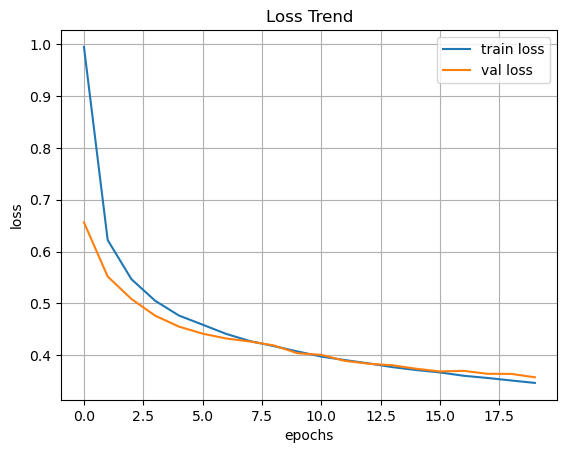

In [11]:
import matplotlib.pyplot as plt

plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(train_loss_list, label="train loss")
plt.plot(val_loss_list, label="val loss")
plt.legend(loc='best')

plt.show()

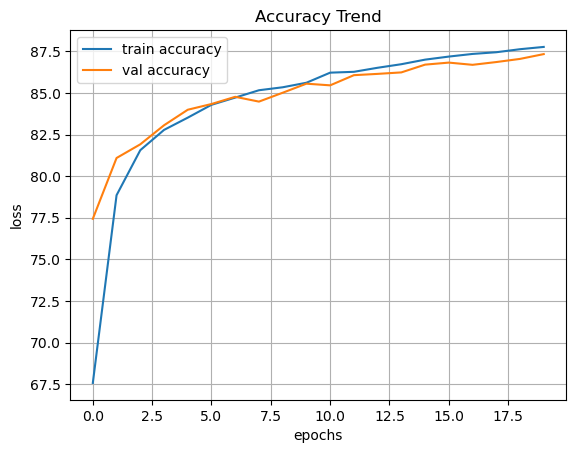

In [12]:
plt.title("Accuracy Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(train_accuracy_list, label="train accuracy")
plt.plot(val_accuracy_list, label="val accuracy")
plt.legend(loc='best')

plt.show()

In [13]:
#CNN
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader

device= torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

print(f'device:{device}')
                     

device:cuda


In [14]:
train_dataset=datasets.MNIST(root="MNIST_data/", train=True, download=True,
                            transform=transforms.ToTensor())

test_dataset=datasets.MNIST(root="MNIST_data/", train=False, download=True,
                           transform=transforms.ToTensor())

train_dataset_size=int(len(train_dataset)*0.85)
validation_dataset_size=int(len(train_dataset)*0.15)

train_dataset, validation_dataset=random_split(train_dataset,[train_dataset_size,validation_dataset_size])

print(len(train_dataset), len(validation_dataset), len(test_dataset))

51000 9000 10000


In [15]:
class MyCNNModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.conv1=nn.Conv2d(in_channels=1,
        out_channels=32, kernel_size=3, padding=1)

        self.conv2=nn.Conv2d(in_channels=32,
        out_channels=64,
        kernel_size=3, padding=1)

        self.pooling=nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1=nn.Linear(7*7*64,256)
        self.fc2=nn.Linear(256,10)

        self.dropout25=nn.Dropout(p=0.25)
        self.dropout50=nn.Dropout(p=0.5)

    def forward(self, data):

        data=self.conv1(data)
        data=torch.relu(data)
        data=self.pooling(data)
        data=self.dropout25(data)

        data=self.conv2(data)
        data=torch.relu(data)
        data=self.pooling(data)
        data=self.dropout25(data)

        data=data.view(-1,7*7*64)

        data=self.fc1(data)
        data=torch.relu(data)
        data=self.dropout50(data)

        logits=self.fc2(data)

        return logits
    

In [16]:
model=MyCNNModel().to(device)

loss_function=nn.CrossEntropyLoss()

optimizer=torch.optim.Adam(model.parameters(), lr=1e-3)

In [17]:
BATCH_SIZE=32

train_dataset_loader=DataLoader(dataset=train_dataset,
                                batch_size=BATCH_SIZE,
                                shuffle=True)
validation_dataset_loader=DataLoader(dataset=validation_dataset,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True)
test_dataset_loader=DataLoader(dataset=test_dataset,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

In [18]:
def model_train(dataloader, model, loss_function, optimizer):

    model.train()

    train_loss_sum=train_correct=train_total=0

    total_train_batch=len(dataloader)

    for images, labels in dataloader:

        x_train=images.to(device)
        y_train=labels.to(device)

        outputs=model(x_train)
        loss=loss_function(outputs, y_train)
                                                                                                       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum+=loss.item()

        train_total+=y_train.size(0)
        train_correct+=((torch.argmax(outputs, 1)==y_train)).sum().item()

    train_avg_loss=train_loss_sum/total_train_batch
    train_avg_accuracy=100*train_correct/train_total

    return (train_avg_loss, train_avg_accuracy)

In [19]:
def model_evaluate(dataloader, model,loss_function, optimizer):

    model.eval()

    with torch.no_grad():

        val_loss_sum=val_correct=val_total=0

        total_val_batch=len(dataloader)

        for images, labes in dataloader:

            x_val=images.to(device)
            y_val=labes.to(device)

            outputs=model(x_val)
            loss=loss_function(outputs, y_val)

            val_loss_sum+=loss.item()

            val_total+=y_val.size(0)
            val_correct+=((torch.argmax(outputs,1)==y_val)).sum().item()

        val_avg_loss=val_loss_sum/total_val_batch
        val_avg_accuracy=100*val_correct/val_total

    return (val_avg_loss, val_avg_accuracy)

In [20]:
def model_test(dataloader, model):

    model.eval()

    with torch.no_grad():

        test_loss_sum=test_correct=test_total=0

        total_test_batch=len(dataloader)

        for images, labels in dataloader:

            x_test=images.to(device)
            y_test=labels.to(device)

            outputs=model(x_test)
            loss=loss_function(outputs, y_test)

            test_loss_sum+=loss.item()

            test_total+=y_test.size(0)
            test_correct+=((torch.argmax(outputs,1)==y_test)).sum().item()

        test_avg_loss=test_loss_sum/total_test_batch
        test_avg_accuracy=100*test_correct/test_total

    return (test_avg_loss, test_avg_accuracy)

In [21]:
train_loss_list=[]
train_accuracy_list=[]

val_loss_list=[]
val_accuracy_list=[]

EPOCH=20

for epoch in range(EPOCH):

    train_avg_loss,train_avg_accuracy=model_train(train_dataset_loader,model, loss_function, optimizer)

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)

    val_avg_loss, val_avg_accuracy=model_evaluate(validation_dataset_loader,model, loss_function, optimizer)

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)

    print(f'epoch:{epoch},train loss:{train_avg_loss}, train accuracy:{train_avg_accuracy}, val loss:{val_avg_loss}, val accuracy:{val_avg_accuracy}')

epoch:0,train loss:0.2472671206325989, train accuracy:92.2078431372549, val loss:0.06861477154174965, val accuracy:97.85555555555555
epoch:1,train loss:0.09373837200259566, train accuracy:97.22549019607843, val loss:0.04731825143301113, val accuracy:98.62222222222222
epoch:2,train loss:0.07096193380416646, train accuracy:97.87450980392157, val loss:0.04061763405092705, val accuracy:98.74444444444444
epoch:3,train loss:0.06267950767346833, train accuracy:98.07450980392157, val loss:0.03617072167506207, val accuracy:98.85555555555555
epoch:4,train loss:0.05382608980512413, train accuracy:98.3529411764706, val loss:0.03521588940917509, val accuracy:98.9
epoch:5,train loss:0.04800062004780678, train accuracy:98.55294117647058, val loss:0.03214967026636756, val accuracy:99.03333333333333
epoch:6,train loss:0.04231229351118173, train accuracy:98.67254901960784, val loss:0.029680204160356893, val accuracy:99.05555555555556
epoch:7,train loss:0.03922303600065127, train accuracy:98.776470588235

In [22]:
test_loss,test_accuracy=model_test(test_dataset_loader,model)

print(f'accuracy: {test_accuracy}')
print(f'loss: {test_loss}')

accuracy: 99.36
loss: 0.02224897748731193


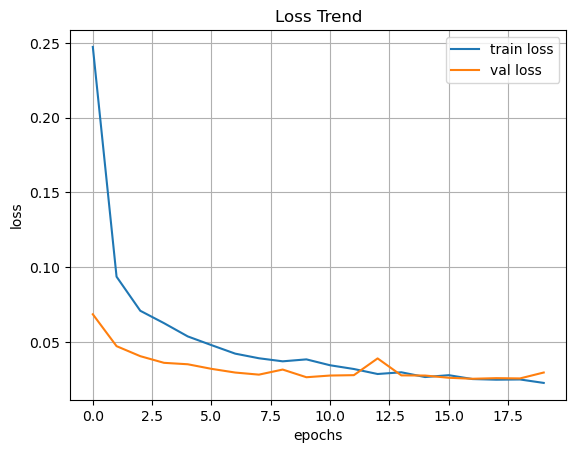

In [23]:
import matplotlib.pyplot as plt

plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(train_loss_list, label="train loss")
plt.plot(val_loss_list, label="val loss")
plt.legend(loc='best')

plt.show()

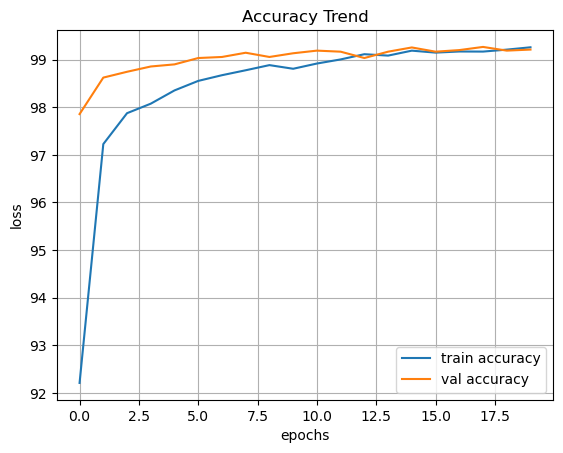

In [24]:
plt.title("Accuracy Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(train_accuracy_list, label="train accuracy")
plt.plot(val_accuracy_list, label="val accuracy")
plt.legend(loc='best')

plt.show()